## MNIST exercise (handwritten printed digits recognition tutorial) ##
**Goal: Introduction to Keras, convolution feature maps, and features**

**Exercise:**
    
1. Review the steps of the code
2. Look at how the model is set up with layers
3. run the notebook, observe the images of filter weights and activations (at end)
4. Try changing the filter size for the first convolution layer to something large (like 9x9 or 16x16)
5. compare the filters and activation to the 3x3 filter size



In [1]:

# ----------- IMPORT STATEMENTS ---------------
import numpy as np
np.random.seed(1)  # for reproducibility
 
from tensorflow import keras

if 1:
 from tensorflow.keras.models import Sequential        #the standard stack of layers models
 from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten   #core layer  functions
 from tensorflow.keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D     #convolution layer functions
 from tensorflow.keras import optimizers                             #For training 

# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
import datetime, os

#---------------------------------------------
print('import done')

import done


In [2]:
#Load MNIST data from Keras datasets
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print('data loaded:'+str(X_train.shape))

data loaded:(60000, 28, 28)


In [3]:
X_train=X_train[0:1000,]  #only need smaller subset to get good results
Y_train=Y_train[0:1000,]

print('train shapes: \n')
print(X_train.shape)     #review the dimensions Note python3 uses print(X..) python 2 uses print X...
print(Y_train.shape)
print('img load done')


train shapes: 

(1000, 28, 28)
(1000,)
img load done


In [4]:
# --------- Reshape input data ------------
#  b/c Keras expects N-3D images (ie 4D matrix)
X_train = X_train[:,:,:,np.newaxis]
X_test  = X_test[:,:,:,np.newaxis]

print('added dimension')

added dimension


In [5]:
#convert and put into 0-1 range
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')

#Scale 0 to 1  - or should we not scale
X_train /= 255
X_test  /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test  = keras.utils.to_categorical(Y_test,  10)

# ------------- End loading and preparing data --------------
#To confirm, we can print X_train's dimensions again:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



(1000, 28, 28, 1)
(1000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [6]:
# --------------Set up Model ---------------------
mymodel = keras.models.Sequential()

numfilters = 16  # <<<< -------- for 10 digits what is min number of filters needed?

#     input shape for 1 image, channels refers to color dimension of input image
mymodel.add(keras.layers.Convolution2D(numfilters, (3,3),strides=1,  data_format="channels_last",activation='relu', input_shape=(28,28,1))) 
#                                                 /\ 
#                                                 /\
#                                                 |--------EXERCISE try changing 3,3  to 9,9 for example 
 
print('modeldef and first conv layer done')


modeldef and first conv layer done


In [7]:
#-----------------Now add more Convolution layers
mymodel.add(Convolution2D(numfilters, (3, 3), strides=1, data_format="channels_last", activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2,2),strides=2,data_format="channels_last")) #get Max over 2D region,and slide
mymodel.add(Flatten())            #reorganize 2DxFilters output into 1D
print('added more layers')

#----------------Now add final classification layers
mymodel.add(Dense(32, activation='relu'))  #enter number of hidden units (no good rule, but start with ~ num of previous output) 
mymodel.add(Dense(10, activation='softmax'))
print('assemble model done')

added more layers
assemble model done


In [8]:
# --------- Now assemble (ie compile TensorFlow commands) and run -----
mymodel.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])
print('compiled')

compiled


In [9]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                73760     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 76,570
Trainable params: 76,570
Non-trainable params: 0
____________________________________________________

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
myES_function = EarlyStopping(monitor='val_loss', mode='min', patience=5) #patience before stopping
   
#------------ Now Run Training
fit_history=mymodel.fit(X_train, Y_train, #validation_split=0.20,
          validation_data=(X_test,Y_test),
          batch_size=32, epochs=20, verbose=1,callbacks=[myES_function])

Epoch 1/20
32/32 [==============================] - 1s 23ms/step - loss: 2.2999 - accuracy: 0.1220 - val_loss: 2.2705 - val_accuracy: 0.2246
Epoch 2/20
32/32 [==============================] - 1s 17ms/step - loss: 2.2395 - accuracy: 0.3310 - val_loss: 2.2045 - val_accuracy: 0.3819
Epoch 3/20
32/32 [==============================] - 1s 17ms/step - loss: 2.1258 - accuracy: 0.4960 - val_loss: 2.0182 - val_accuracy: 0.5088
Epoch 4/20
32/32 [==============================] - 1s 17ms/step - loss: 1.7768 - accuracy: 0.5970 - val_loss: 1.5325 - val_accuracy: 0.5611
Epoch 5/20
32/32 [==============================] - 1s 17ms/step - loss: 1.1514 - accuracy: 0.7010 - val_loss: 1.0976 - val_accuracy: 0.6688
Epoch 6/20
32/32 [==============================] - 1s 17ms/step - loss: 0.7841 - accuracy: 0.7840 - val_loss: 0.7471 - val_accuracy: 0.7745
Epoch 7/20
32/32 [==============================] - 1s 17ms/step - loss: 0.6022 - accuracy: 0.8200 - val_loss: 0.7181 - val_accuracy: 0.7627
Epoch 8/20
32

In [11]:
!nvidia-smi
tf.config.list_physical_devices()

Failed to initialize NVML: Driver/library version mismatch


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


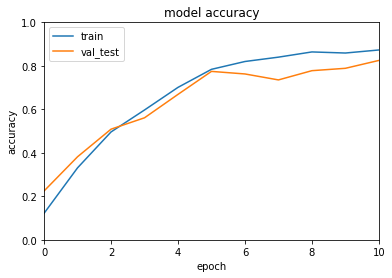

In [12]:
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg
%matplotlib inline                   

# list all data in history and print out performance
print(fit_history.history.keys())

# summarize history for accuracy
plt.figure()
plt.axis([0 ,10, 0, 1])
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper left')
plt.show()

In [13]:
#

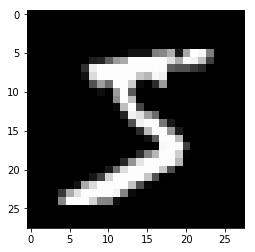

In [14]:
#To view a sample image
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg

tmpimg=np.squeeze(X_train[0,:,:,:]).reshape((28,28))
plt.imshow(tmpimg,'gray')   

W3D shape Wlist[0]:(3, 3, 16)


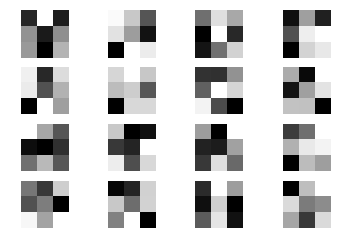

done plotting weights mosaic


In [15]:
# ------------ GET WEIGHTS From Convolution Layer and make mosaic image 
Wlist   =mymodel.layers[0].get_weights()      
W3D     =np.squeeze(Wlist[0])
print("W3D shape Wlist[0]:"+str(W3D.shape))
W3Dchan =W3D.swapaxes(1,2).swapaxes(0,1)  #get the channels as 1st dimension;

#plot mosaic of filters of 
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(W3Dchan.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(W3Dchan[i],'gray')
   plt.axis('off')

plt.show()
print('done plotting weights mosaic')

In [16]:
#

In [17]:
#  ---------------- NOW Visualize the activations for the first training example --------
#   1. gather activations from the model layers
# -------------------------------------------------------------------------
import numpy as np

layer_outputs     = [layer.output for layer in mymodel.layers[:]]
my_model_actvtns  = keras.models.Model(inputs=mymodel.input, outputs=layer_outputs)
x                 = np.expand_dims(X_train[0],0)           #set up a 4D input of 1 image training set 
my_actvtns_output = my_model_actvtns.predict(x)   #for each image get predictions/activatns

print(str(len(my_actvtns_output))+ ' layers with output activations')



6 layers with output activations


In [18]:
#

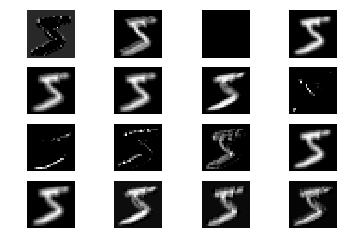

done plotting layer1 activation output mosaic


In [19]:
# 2.  Now output a mosaic of layer 1
layeroutput3D      = np.squeeze(my_actvtns_output[0]) #<<---- -try different layer output     
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(layeroutput3D.shape[2]):  
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[:,:,i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer1 activation output mosaic')
